In [1]:
# !pip install mlxtend --upgrade

In [2]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from mlxtend.evaluate import bias_variance_decomp
  from sklearn.pipeline import make_pipeline

In [3]:
plt.style.use('ggplot')

In [4]:
def draw_raw_data_and_prediction(x, y, X_new, y_new, deg):
  plt.scatter(x, y, label = 'data')
  plt.plot(X_new, y_new, "b-", linewidth=2, label="Predictions")
  plt.xlabel("$x$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.title('fit degree %d' % deg)
  plt.legend()
  plt.show()


### Generate noisy sine wave

In [5]:
def f(x):
  return np.sin(2*np.pi*x)

def generating_func(x, err=0.5):
    return np.random.normal(f(x), err)

###samples, train and test

In [6]:
n_samples = 200
test_size = 0.4
error = 1.0

# randomly sample the data
np.random.seed(1)
x_train = np.random.random(n_samples)
y_train = generating_func(x_train, error)

x_test = np.linspace(0, 1, 80)
y_test = generating_func(x_test, error)

###Plot noisy sine wave, test and train

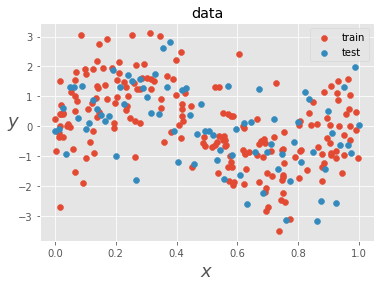

In [7]:
plt.scatter(x_train, y_train, label = 'train')
plt.scatter(x_test, y_test, label = 'test')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('data')
plt.legend()
plt.show()

### fit and evalution

MSE: 1.427
Bias: 1.413
Variance: 0.014


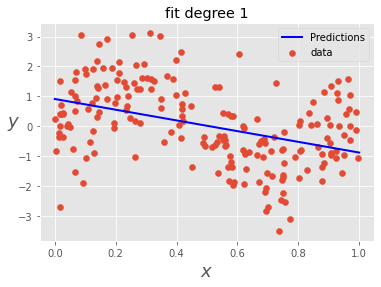

MSE: 1.260
Bias: 1.240
Variance: 0.020


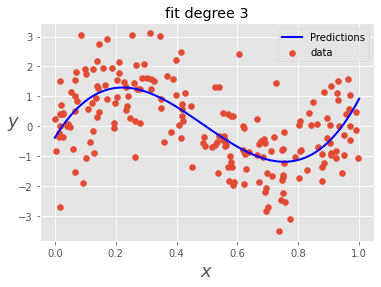

MSE: 1.325
Bias: 1.285
Variance: 0.041


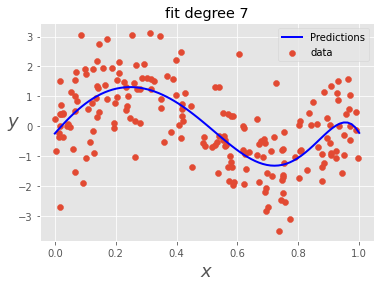

MSE: 1.392
Bias: 1.265
Variance: 0.128


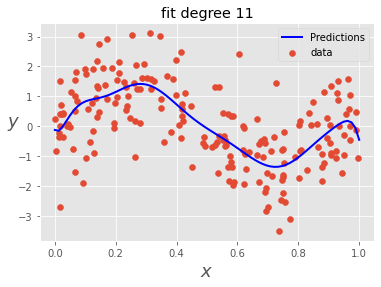

MSE: 2.460
Bias: 1.265
Variance: 1.195


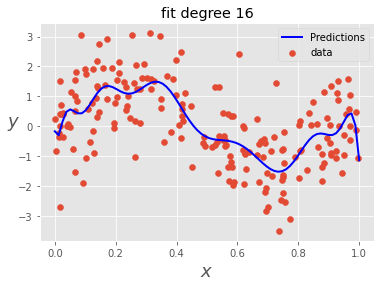

MSE: 14.061
Bias: 2.122
Variance: 11.939


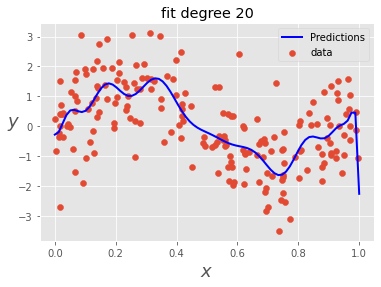

In [8]:
degs = [1, 3, 7, 11, 16, 20]

biases = []
vars = []
mses = []

for deg in degs:
  model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
  # estimate bias and variance
  mse, bias, var = bias_variance_decomp(model, x_train[:, np.newaxis], y_train, x_test[:, np.newaxis], y_test, loss='mse', num_rounds=200, random_seed=1)
  # summarize results
  biases.append(bias)
  vars.append(var)
  mses.append(mse)

  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)
  model.fit(x_train[:, np.newaxis], y_train)
  y_pred = model.predict(x_test[:, np.newaxis])
  draw_raw_data_and_prediction(x_train, y_train, x_test, y_pred, deg)


In [9]:
data_out = {'MSE' : mses, 'var' : vars, 'bias^2' : biases, 'bias' : [np.sqrt(i) for i in biases]}
df = pd.DataFrame.from_dict(data_out)
df.index = ['deg = ' + str(i) for i in degs]
df

,MSE,var,bias^2,bias
deg = 1,1.426971,0.013796,1.413175,1.188770
deg = 3,1.260084,0.020079,1.240005,1.113555
deg = 7,1.325258,0.040535,1.284723,1.133456
deg = 11,1.392495,0.127841,1.264653,1.124568
deg = 16,2.459726,1.195218,1.264508,1.124504
deg = 20,14.060556,11.938965,2.121591,1.456568
